### 3-parameter exponential fitted $\beta$-scaling

Want to fit observable data as a function of $\beta$ to the form:
$$
\mathcal{O}(\beta) = \mathcal{O}_{\beta\to\infty} + C_1 e^{-C_2 \beta}
$$

where $\mathcal{O}_{\beta\to\infty}$,$C_1$, and $C_2$ are fitting parameters. The $\mathcal{O}_{\beta\to\infty}$ parameter will give a large $\beta$ extrapolation of the observable in question. Here, we will focus on the second Rényi entanglement entropy $S_2$.

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

Define the exponential model

In [199]:
def exponential(x, c1, c2, c3):
    return c3 + c1*np.exp(-x*c2)

Feed data points (obtained from a separate script)

In [219]:
# Define data points
x_array = np.array([1,2,4,8,16,32]) # betas
y_array_exp = np.array([2.576307140574922, 2.3343548168200643, 2.0456394989015236, 1.7787633290633356, 1.2009223750515656, 1.0000371792405751])

sigmas = np.array([0.015823911272018296, 0.01760741324515481, 0.019430967756887955, 0.02510416339097551, 0.0435387752262529, 0.12130151705665107])

Text(0.5, 0, '$\\beta$')

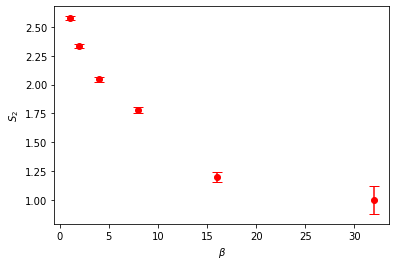

In [220]:
# Plot data
plt.errorbar(x_array,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

Perform exponential fit to data with Scipy curve_fit

In [221]:
U = 4.843100

In [243]:
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array[0:], y_array_exp[0:],sigma=sigmas[0:],p0=[0.9,0.02*U,y_array_exp[-1]])



In [244]:
popt_exponential

array([1.72647226, 0.11658255, 1.00608191])

In [245]:
pcov_exponential

array([[ 0.06387975, -0.00784631, -0.06929753],
       [-0.00784631,  0.00140095,  0.00986874],
       [-0.06929753,  0.00986874,  0.08025044]])

In [246]:
# Extract fit parameters
c1,c2,c3 = popt_exponential

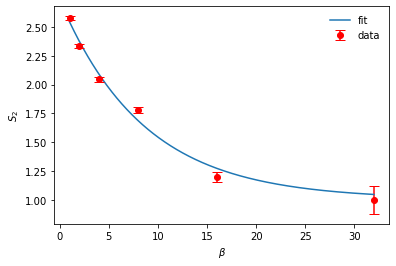

In [247]:
# Perform the fit
betas_fit = np.linspace(min(x_array),max(x_array)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(x_array,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

# plt.axhline(1.4313869097241088,color="#999999",zorder=-1)

# plt.savefig("U0.5_bs10000.png",dpi=300)

In [248]:
c3 = popt_exponential[2]
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

In [249]:
print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.006082 +/- 0.283285


In [217]:
Us = np.array([0.500000,
0.730000,
1.065800,
1.556100, 
2.272000, 
3.300000, 
4.843100, 
7.071100,   
10.323900,
16.666667, 
22.007100, 
32.130800,
46.911700,
68.492100, 
100.000000])

In [ ]:
c3s = np.array([
])